In [3]:
import chess

board = chess.Board()
board.piece_map()

{63: Piece.from_symbol('r'),
 62: Piece.from_symbol('n'),
 61: Piece.from_symbol('b'),
 60: Piece.from_symbol('k'),
 59: Piece.from_symbol('q'),
 58: Piece.from_symbol('b'),
 57: Piece.from_symbol('n'),
 56: Piece.from_symbol('r'),
 55: Piece.from_symbol('p'),
 54: Piece.from_symbol('p'),
 53: Piece.from_symbol('p'),
 52: Piece.from_symbol('p'),
 51: Piece.from_symbol('p'),
 50: Piece.from_symbol('p'),
 49: Piece.from_symbol('p'),
 48: Piece.from_symbol('p'),
 15: Piece.from_symbol('P'),
 14: Piece.from_symbol('P'),
 13: Piece.from_symbol('P'),
 12: Piece.from_symbol('P'),
 11: Piece.from_symbol('P'),
 10: Piece.from_symbol('P'),
 9: Piece.from_symbol('P'),
 8: Piece.from_symbol('P'),
 7: Piece.from_symbol('R'),
 6: Piece.from_symbol('N'),
 5: Piece.from_symbol('B'),
 4: Piece.from_symbol('K'),
 3: Piece.from_symbol('Q'),
 2: Piece.from_symbol('B'),
 1: Piece.from_symbol('N'),
 0: Piece.from_symbol('R')}

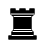

In [4]:
board.piece_at(63)